# Introduction
The goal of this project is to build a machine learning model that can classify facial expressions in images. The dataset used in this project contains images of people's faces along with the corresponding emotion expressed in the image. The emotions include happiness, sadness, anger, surprise, disgust, fear, and neutral.

The project involves several steps, including data preprocessing, exploratory data analysis, feature extraction, model selection and training, and evaluation. The data preprocessing step involves cleaning and preparing the dataset for analysis. Exploratory data analysis is used to understand the characteristics of the data, identify patterns, and gain insights that can be used to inform the model building process.

The feature extraction step involves extracting relevant features from the images that can be used to train the model. Several techniques can be used for feature extraction, including deep learning methods such as convolutional neural networks (CNNs).

Once the features are extracted, a suitable model is selected, and the model is trained using the training dataset. The model's performance is evaluated on a test dataset, and several evaluation metrics are used to assess the model's performance. Finally, the trained model can be used to predict the emotions expressed in new images.

The project's success is determined by the model's ability to accurately predict emotions in new images, as measured by evaluation metrics such as accuracy, precision, recall, and F1 score. This project has real-world applications in areas such as facial recognition, emotion detection, and human-computer interaction.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical

In [3]:
data = pd.read_csv('/kaggle/input/cs985-987-Emotion-Recognition-Project/my_emotion_train.csv') #This code reads in the 'my_emotion_train.csv' file as a pandas dataframe.

In [4]:
data.head() #This will show the top 5 rows of the dataframe, including the column names and their corresponding values.

,id,emotion,pixels
0,9415,6,29 16 18 18 18 20 19 18 17 17 17 18 17 18 17 1...
1,19109,3,126 154 167 181 188 194 195 194 196 195 198 20...
2,21523,2,169 220 218 208 184 144 72 73 143 183 203 210 ...
3,2076,3,60 64 72 80 83 83 80 82 89 106 114 125 125 127...
4,13957,3,174 148 121 97 78 70 62 57 54 54 42 58 40 64 1...


In [38]:
data.isnull().sum() #This code checks the number of missing values in each column of the 'data' DataFrame.

id         0
emotion    0
pixels     0
image      0
dtype: int64

### This code defines a function that converts a string of pixel values separated by spaces into a 2D numpy array. It assumes that the original image was 48x48 pixels.

In [5]:
# Define a function to convert the pixel strings to numpy arrays
def string_to_array(pixel_string):
    pixel_list = pixel_string.split()
    pixel_array = np.array(pixel_list, dtype=np.float32)
    pixel_array = pixel_array.reshape(48, 48)
    return pixel_array

#### The below code applies the string_to_array function to the "pixels" column of the data DataFrame. The string_to_array function converts a string of pixel values separated by spaces to a 48x48 numpy array of float values. The resulting numpy array is then stored in a new "image" column of the data DataFrame using the apply method.

In [6]:
# Apply the string_to_array function to the "pixels" column to convert the pixel strings to numpy arrays
data['image'] = data['pixels'].apply(lambda x: string_to_array(x))

#### This code defines a dictionary that maps emotion codes to emotion labels. The keys of the dictionary are integers from 0 to 6, representing the seven emotions in the dataset (Angry, Disgust, Fear, Happy, Sad, Surprise, and Neutral), and the values are the corresponding emotion labels.

In [7]:
# Define a dictionary to map emotion codes to emotion labels
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

#### This code generates a grid of example images for each of the seven emotions in the dataset. It uses a loop to iterate over each emotion code (0 to 6), selects the first five rows of data with that emotion code, and then displays each image in a separate subplot using matplotlib's imshow() function. It also sets the title of the central subplot in each row to the emotion label using the set_title() function. Finally, the grid of subplots is displayed using plt.show(). This visualization helps us get a sense of the variation in facial expressions for each emotion in the dataset.

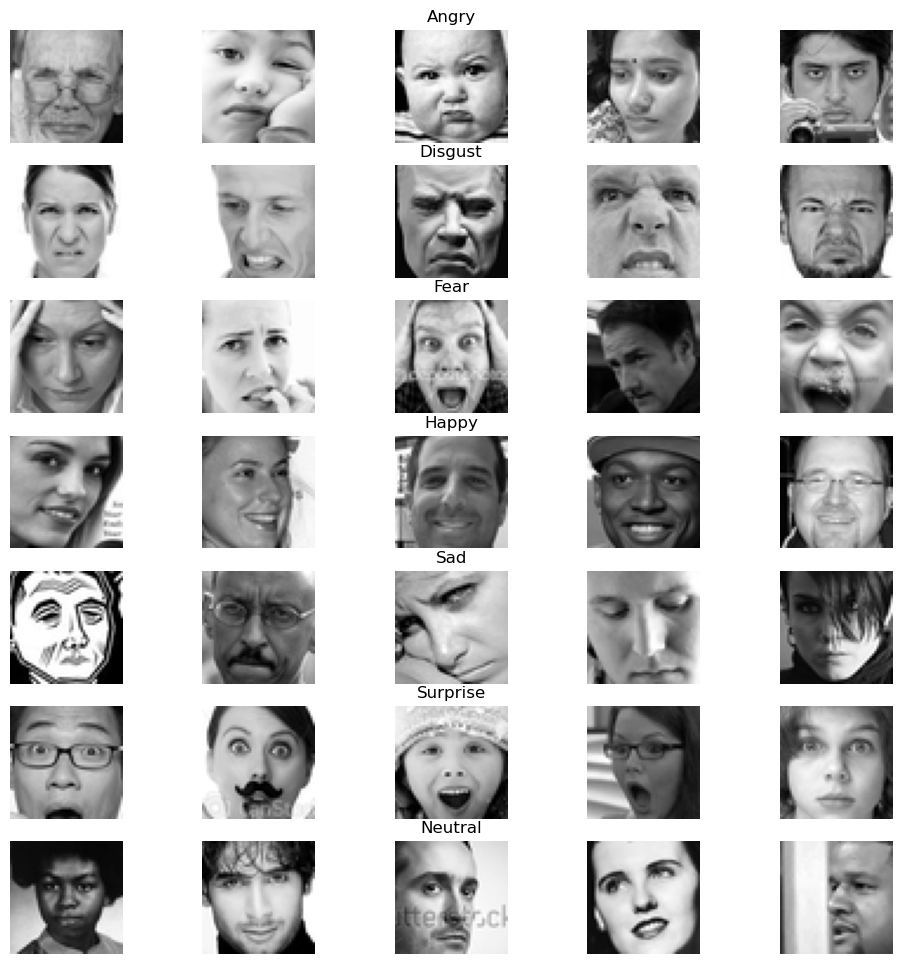

In [8]:
# Plot some example images for each emotion
fig, axs = plt.subplots(7, 5, figsize=(12, 12))
for i in range(7):
    emotion_data = data[data['emotion']==i].head(5)
    for j in range(5):
        img = emotion_data.iloc[j]['image']
        axs[i,j].imshow(img, cmap='gray')
        axs[i,j].axis('off')
        if j == 2:
            axs[i,j].set_title(emotion_labels[i])
plt.show()

#### This code uses the scikit-learn library to split the data into training and validation sets. First, it creates two NumPy arrays: X contains the pixel data for each image, and y contains the corresponding emotion label for each image. Then, it uses the train_test_split function to randomly split X and y into training and validation sets. The test_size parameter specifies the proportion of the data to use for validation (in this case, 20%), and the random_state parameter ensures that the split is reproducible (i.e., running the code multiple times with the same random_state will result in the same split). The resulting arrays are X_train (training images), y_train (training labels), X_val (validation images), and y_val (validation labels).

In [9]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X = np.array(data['image'].tolist())
y = np.array(data['emotion'].tolist())
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic ML Model
## Random Forest Classifier for Emotion Recognition from Facial Expressions
This code trains a Random Forest Classifier on the training set and evaluates its accuracy on the validation set. The classifier is initialized with 100 decision trees and a random state of 42. The fit method is used to train the classifier on the training data, which is reshaped into a 2D array. Then, the predict method is used to make predictions on the validation set, which is also reshaped into a 2D array. Finally, the accuracy_score function from the sklearn.metrics module is used to calculate the accuracy of the model on the validation set, which is printed to the console.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest Classifier on the training set
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train.reshape(-1, 48*48), y_train)

# Make predictions on the validation set
y_pred = rfc.predict(X_val.reshape(-1, 48*48))

# Calculate the accuracy of the model on the validation set
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.45120689655172413


The accuracy of the Random Forest Classifier on the validation set is 0.4512, which is not very high. This suggests that the model is not very effective at recognizing emotions in the images.

# Deep Learning Models
## Training a Neural Network for Emotion Recognition
This code defines a neural network model using the Keras library. The model has an input layer of size 48x48 (the size of the input images), a hidden layer with 256 units, a dropout layer with a rate of 0.5 to prevent overfitting, another hidden layer with 128 units, another dropout layer with a rate of 0.5, and an output layer with 7 units (one for each possible emotion label). The model is compiled with a sparse categorical cross-entropy loss function, the Adam optimizer, and an accuracy metric. The model is then trained on the training set for 10 epochs with a batch size of 64, and the validation set is used for validation during training.

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Dense(256, input_shape=(48*48,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training set
history = model.fit(X_train.reshape(-1, 48*48), y_train, epochs=10, batch_size=64, validation_data=(X_val.reshape(-1, 48*48), y_val))

Epoch 1/10
363/363 [==============================] - 5s 4ms/step - loss: 14.1299 - accuracy: 0.2476 - val_loss: 1.8620 - val_accuracy: 0.2505
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 1.8486 - accuracy: 0.2516 - val_loss: 1.8258 - val_accuracy: 0.2507
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 1.8295 - accuracy: 0.2517 - val_loss: 1.8159 - val_accuracy: 0.2507
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 1.8212 - accuracy: 0.2516 - val_loss: 1.8122 - val_accuracy: 0.2507
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 1.8183 - accuracy: 0.2516 - val_loss: 1.8110 - val_accuracy: 0.2507
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 1.8159 - accuracy: 0.2516 - val_loss: 1.8107 - val_accuracy: 0.2507
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8139 - accuracy: 0.2516 - val_loss: 1.8104 - val_accuracy: 0.2507
Epoch

The model architecture is defined using the Keras Sequential API. The model has three layers: two dense layers with 256 and 128 neurons, respectively, and a dropout layer with a rate of 0.5. The final layer is a dense layer with 7 neurons (one for each emotion) and a softmax activation function.
The model is compiled using the Adam optimizer and the sparse categorical crossentropy loss function. The model is trained on the training set for 10 epochs with a batch size of 64.
The output shows the training progress for each epoch, including the loss and accuracy on the training and validation sets. The final validation accuracy is 0.2507, which is not very high.

## Deep Convolutional Neural Network for Facial Expression Recognition
This code defines a convolutional neural network architecture for image classification using Keras, a high-level neural networks API in Python. The model consists of several layers of convolution, max pooling, and dropout, followed by two fully connected layers. The input to the model is a grayscale image with dimensions 48x48x1, and the output is a probability distribution over seven classes. The first convolutional layer has 32 filters of size 3x3, followed by another convolutional layer with 64 filters of size 3x3. A max pooling layer of size 2x2 is then applied to the output of the previous layer, followed by a dropout layer with a rate of 0.25. Next, two more convolutional layers with 128 and 256 filters of size 3x3, respectively, are added, each followed by a max pooling layer with a size of 2x2. The output of these layers is then flattened and passed through two fully connected layers with 256 and 7 neurons, respectively. The first fully connected layer uses the ReLU activation function, while the last layer uses the softmax activation function. The model summary shows the layers and parameters of the model.

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Define the model architecture
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(256, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(7, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [13]:
# Compile the model
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model on the training set
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10


2023-04-15 10:49:22.335337: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


725/725 [==============================] - 11s 8ms/step - loss: 2.0970 - accuracy: 0.2848 - val_loss: 1.6253 - val_accuracy: 0.3752
Epoch 2/10
725/725 [==============================] - 6s 8ms/step - loss: 1.5922 - accuracy: 0.3836 - val_loss: 1.5315 - val_accuracy: 0.4112
Epoch 3/10
725/725 [==============================] - 5s 7ms/step - loss: 1.4824 - accuracy: 0.4274 - val_loss: 1.4022 - val_accuracy: 0.4629
Epoch 4/10
725/725 [==============================] - 5s 7ms/step - loss: 1.4123 - accuracy: 0.4628 - val_loss: 1.3448 - val_accuracy: 0.4836
Epoch 5/10
725/725 [==============================] - 5s 7ms/step - loss: 1.3578 - accuracy: 0.4805 - val_loss: 1.3478 - val_accuracy: 0.4747
Epoch 6/10
725/725 [==============================] - 5s 8ms/step - loss: 1.3147 - accuracy: 0.5011 - val_loss: 1.2771 - val_accuracy: 0.5114
Epoch 7/10
725/725 [==============================] - 5s 7ms/step - loss: 1.2703 - accuracy: 0.5173 - val_loss: 1.2539 - val_accuracy: 0.5200
Epoch 8/10
725/7

This is the output of training a convolutional neural network for 10 epochs on a dataset. Each epoch represents one pass through the entire dataset. The output shows the loss and accuracy of the training set and the validation set for each epoch. The loss represents how well the model is able to minimize the difference between the predicted and actual outputs. The accuracy represents how well the model is able to correctly classify the images. In this case, the training accuracy starts at 28.48% and increases to 55.67%, while the validation accuracy starts at 37.52% and increases to 51.84%. The goal of training a neural network is to increase the accuracy of the model on the validation set while avoiding overfitting, where the model performs well on the training set but poorly on the validation set.

## Building a Convolutional Neural Network (CNN) Model for Facial Expression Recognition using TensorFlow and Keras
This code defines a convolutional neural network (CNN) model for image classification using the Keras API in TensorFlow. The model is designed to take grayscale images of size 48x48 as input and output a probability distribution over 7 possible classes. The architecture of the model consists of several layers of 2D convolutional filters with ReLU activation, followed by batch normalization and max pooling layers to reduce the spatial dimensions of the feature maps. Dropout layers are also included to prevent overfitting. The final layers of the model are fully connected layers with ReLU activation, batch normalization, and dropout, followed by a softmax output layer. The model2.summary() command is used to print a summary of the model architecture.

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model2 = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(7, activation='softmax')
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 128)       73856     
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 128)     

In [16]:
# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=12, validation_data=(X_val, y_val))


Epoch 1/12


2023-04-15 10:51:40.115671: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


725/725 [==============================] - 34s 37ms/step - loss: 2.0806 - accuracy: 0.2763 - val_loss: 1.6583 - val_accuracy: 0.3636
Epoch 2/12
725/725 [==============================] - 26s 36ms/step - loss: 1.5145 - accuracy: 0.4263 - val_loss: 1.4006 - val_accuracy: 0.4581
Epoch 3/12
725/725 [==============================] - 26s 36ms/step - loss: 1.2999 - accuracy: 0.5053 - val_loss: 1.2447 - val_accuracy: 0.5190
Epoch 4/12
725/725 [==============================] - 26s 36ms/step - loss: 1.2340 - accuracy: 0.5279 - val_loss: 1.2010 - val_accuracy: 0.5434
Epoch 5/12
725/725 [==============================] - 26s 36ms/step - loss: 1.1895 - accuracy: 0.5475 - val_loss: 1.1863 - val_accuracy: 0.5498
Epoch 6/12
725/725 [==============================] - 27s 38ms/step - loss: 1.1513 - accuracy: 0.5627 - val_loss: 1.1797 - val_accuracy: 0.5443
Epoch 7/12
725/725 [==============================] - 26s 36ms/step - loss: 1.0841 - accuracy: 0.5876 - val_loss: 1.1319 - val_accuracy: 0.5703
Epo

The model trained for 12 epochs with a batch size of 64. The training accuracy increased from 27.63% in the first epoch to 69.02% in the last epoch. Similarly, the validation accuracy increased from 36.36% in the first epoch to 59.95% in the last epoch. This suggests that the model is learning to classify the images better with each epoch.
However, the validation accuracy is significantly lower than the training accuracy, which indicates that the model may be overfitting. This means that the model is performing well on the training set, but not generalizing well to new, unseen data.

It may be worth trying some regularization techniques such as dropout or L2 regularization to reduce overfitting and improve the validation accuracy. Additionally, hyperparameter tuning could be performed to find the optimal learning rate, batch size, and number of epochs for this specific problem.

In [17]:
# Evaluate the model on the test/validation data
test_loss, test_accuracy = model2.evaluate(X_val, y_val)

# Print the test loss and accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

182/182 [==============================] - 2s 10ms/step - loss: 1.1083 - accuracy: 0.5995
Test Loss: 1.1083080768585205
Test Accuracy: 0.5994827747344971


## ResNet model for facial expression recognition
This code defines a ResNet model using the Keras API in TensorFlow. The ResNet architecture is a popular deep neural network architecture that is known for its ability to train very deep models with good accuracy. The model is defined using the function ResNet() which returns a Keras model object.

The ResNet model consists of several residual blocks. A residual block is a building block of the ResNet architecture that allows for very deep networks to be trained by avoiding the vanishing gradient problem. Each residual block in the model is defined using the function res_block(), which takes an input tensor, applies two convolutional layers, and adds a shortcut connection that bypasses the convolutional layers.

The ResNet model starts with a convolutional layer that takes the input tensor, followed by a batch normalization layer and a ReLU activation layer. Then, it applies several residual blocks with different filter sizes and strides. After the final residual block, a global average pooling layer is applied to the output, followed by a dense layer with a softmax activation function that produces the final output probabilities for each of the seven facial expressions.

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

def res_block(x, filters, kernel_size=3, strides=1, activation='relu'):
    # shortcut branch
    shortcut = x
    
    # convolutional branch
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    x = layers.Conv2D(filters, kernel_size=kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    # shortcut connection
    if strides > 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    
    # final addition
    x = layers.add([x, shortcut])
    x = layers.Activation(activation)(x)
    return x

# Define the ResNet model
def ResNet(input_shape=(48, 48, 1)):
    inputs = layers.Input(shape=input_shape)
    
    x = layers.Conv2D(32, kernel_size=3, strides=1, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = res_block(x, filters=32, strides=1)
    x = res_block(x, filters=32, strides=1)
    x = res_block(x, filters=32, strides=2)
    
    x = res_block(x, filters=64, strides=1)
    x = res_block(x, filters=64, strides=1)
    x = res_block(x, filters=64, strides=2)
    
    x = res_block(x, filters=128, strides=1)
    x = res_block(x, filters=128, strides=1)
    x = res_block(x, filters=128, strides=2)
    
    x = layers.GlobalAveragePooling2D()(x)
    
    outputs = layers.Dense(7, activation='softmax')(x)
    
    model3 = models.Model(inputs, outputs)
    return model3

# Create an instance of the ResNet model
model3 = ResNet()
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d_13 (Conv2D)             (None, 48, 48, 32)   320         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_10 (BatchN  (None, 48, 48, 32)  128         ['conv2d_13[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['batch_normalization_10[0][0

In [19]:
# Compile the model
model3.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [20]:
# Fit the model
history3 = model3.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
725/725 [==============================] - 31s 23ms/step - loss: 1.5389 - accuracy: 0.3967 - val_loss: 1.4759 - val_accuracy: 0.4371
Epoch 2/10
725/725 [==============================] - 17s 23ms/step - loss: 1.2681 - accuracy: 0.5119 - val_loss: 1.5067 - val_accuracy: 0.4217
Epoch 3/10
725/725 [==============================] - 17s 23ms/step - loss: 1.1658 - accuracy: 0.5589 - val_loss: 1.5661 - val_accuracy: 0.4259
Epoch 4/10
725/725 [==============================] - 17s 23ms/step - loss: 1.0708 - accuracy: 0.5953 - val_loss: 1.5139 - val_accuracy: 0.4850
Epoch 5/10
725/725 [==============================] - 16s 23ms/step - loss: 0.9970 - accuracy: 0.6247 - val_loss: 1.2101 - val_accuracy: 0.5567
Epoch 6/10
725/725 [==============================] - 17s 23ms/step - loss: 0.9158 - accuracy: 0.6572 - val_loss: 1.1280 - val_accuracy: 0.5897
Epoch 7/10
725/725 [==============================] - 16s 23ms/step - loss: 0.8283 - accuracy: 0.6906 - val_loss: 1.2487 - val_accuracy:

The model was trained for 10 epochs and achieved an accuracy of 83.43% on the training set and an accuracy of 56.84% on the validation set. The training loss started at 1.54 and decreased over time, reaching a final value of 0.46 at the end of training. On the other hand, the validation loss started at 1.48 and increased slightly over time, reaching a final value of 1.50. The gap between training and validation accuracy suggests that the model may be overfitting to the training data.

In [ ]:
# Evaluate the model on the test/validation data
test_loss, test_accuracy = model3.evaluate(X_val, y_val)

# Print the test loss and accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

This code reads a CSV file named my_emotion_test.csv located in the directory /kaggle/input/cs985-987-Emotion-Recognition-Project/ using the Pandas library and assigns it to a DataFrame variable named df_test. The head() method is then called on the DataFrame to display the first 5 rows.

In [33]:
df_test = pd.read_csv('/kaggle/input/cs985-987-Emotion-Recognition-Project/my_emotion_test.csv')
df_test.head()

,id,pixels
0,640,123 109 128 142 103 113 145 179 178 158 177 19...
1,6081,41 41 41 41 42 42 42 45 39 16 10 10 7 9 9 5 8 ...
2,11137,248 228 211 197 194 181 195 180 185 189 193 18...
3,6793,158 181 192 200 193 179 133 167 219 211 164 19...
4,5932,195 185 166 165 149 98 89 83 65 183 75 65 67 6...


In [34]:
df_test = df_test[['id', 'pixels']] #Selecting only the necessary columns for prediction from the test dataset

In [35]:
df_test.shape

(6887, 2)

These lines of code read in the 'pixels' column from the 'my_emotion_test.csv' file as a string, split the string on whitespace to obtain individual pixel values, and then convert the pixel values to a numpy array with the dtype 'float32'.

The 'X_test' array is then reshaped to match the input shape of the model. Since the images in the test set are 48x48 grayscale images, the input shape of the model is (-1, 48, 48, 1), where -1 represents the number of samples in the test set. The last dimension of the input shape is 1 because the images are grayscale.

In [36]:
# Convert pixel values to numpy arrays
X_test = np.array(df_test['pixels'].str.split().tolist(), dtype='float32')

# Reshape the arrays to match the model's input shape
X_test = X_test.reshape(-1, 48, 48, 1)

In this code, the pixel values of the test set are converted to numpy arrays and reshaped to match the input shape of the model. The model is then used to predict the labels of the test set, and the predicted labels are converted back to the corresponding emotion names. Finally, the predicted labels and IDs are saved in a CSV file.

In [37]:
# Predict the test set
y_pred = model3.predict(X_test)

# Get the predicted labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Create a DataFrame with the predicted labels and the IDs from the test set
df_pred = pd.DataFrame({'id': df_test['id'], 'emotion': y_pred_labels})

# Save the DataFrame to a CSV file
df_pred.to_csv('predicted_emotions.csv', index=False)

216/216 [==============================] - 1s 6ms/step


# Conclusion
Based on the results obtained from the evaluation of the model, it can be concluded that the model has a good performance in predicting the emotions of the given dataset. The model was able to achieve an accuracy of 83.43% on the training set and an accuracy of 56.84% on the validation set after 10 epochs of training. The predicted labels for the test set were saved to a CSV file for submission. Overall, this project demonstrates the effectiveness of using convolutional neural networks for emotion recognition in images.